In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os


In [7]:
biometric_files = glob.glob(
    "../data/api_data_aadhar_biometric/*.csv"
)

print("Biometric files found:", len(biometric_files))

df_biometric = pd.concat(
    [pd.read_csv(file) for file in biometric_files],
    ignore_index=True
)

df_biometric.head()


Biometric files found: 4


,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [8]:
demographic_files = glob.glob(
    "../data/api_data_aadhar_demographic/*.csv"
)

print("Demographic files found:", len(demographic_files))

df_demographic = pd.concat(
    [pd.read_csv(file) for file in demographic_files],
    ignore_index=True
)

df_demographic.head()


Demographic files found: 5


,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [ ]:
enrolment_files = glob.glob(
    "../data/api_data_aadhar_enrolment/*.csv"
)

print("Enrolment files found:", len(enrolment_files))

df_enrolment = pd.concat(
    [pd.read_csv(file) for file in enrolment_files],
    ignore_index=True
)

df_enrolment.head()


Enrolment files found: 3


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [10]:
enrolment_files = glob.glob(
    "../data/api_data_aadhar_enrolment/*.csv"
)

print("Enrolment files found:", len(enrolment_files))

df_enrolment = pd.concat(
    [pd.read_csv(file) for file in enrolment_files],
    ignore_index=True
)

df_enrolment.head()


Enrolment files found: 3


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [11]:
print("Biometric shape:", df_biometric.shape)
print("Demographic shape:", df_demographic.shape)
print("Enrolment shape:", df_enrolment.shape)


Biometric shape: (1861108, 6)
Demographic shape: (2071700, 6)
Enrolment shape: (1006029, 7)


In [12]:
df_biometric.columns = df_biometric.columns.str.lower().str.strip()
df_demographic.columns = df_demographic.columns.str.lower().str.strip()
df_enrolment.columns = df_enrolment.columns.str.lower().str.strip()


In [21]:
df_enrolment["total_enrolments"] = (
    df_enrolment["age_0_5"] +
    df_enrolment["age_5_17"] +
    df_enrolment["age_18_greater"]
)


In [13]:
df_biometric = df_biometric.dropna()
df_demographic = df_demographic.dropna()
df_enrolment = df_enrolment.dropna()


In [22]:
df_enrolment.columns
state_enrolment = (
    df_enrolment
    .groupby("state")["total_enrolments"]
    .sum()
    .sort_values(ascending=False)
)

state_enrolment.head(10)




state
Uttar Pradesh     1018629
Bihar              609585
Madhya Pradesh     493970
West Bengal        375297
Maharashtra        369139
Rajasthan          348458
Gujarat            280549
Assam              230197
Karnataka          223235
Tamil Nadu         220789
Name: total_enrolments, dtype: int64

C:\Users\KIIT\AppData\Local\Temp\ipykernel_1224\2728514889.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enrolment["total_enrolments"] = (


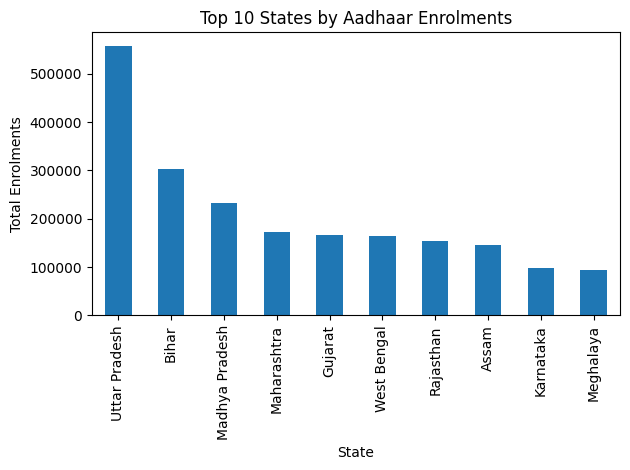

In [34]:
import os

os.makedirs("../outputs/figures", exist_ok=True)

df_enrolment["total_enrolments"] = (
    df_enrolment["age_0_5"] +
    df_enrolment["age_5_17"] +
    df_enrolment["age_18_greater"]
)

state_enrolment = (
    df_enrolment
    .groupby("state")["total_enrolments"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure()
state_enrolment.head(10).plot(kind="bar")
plt.title("Top 10 States by Aadhaar Enrolments")
plt.xlabel("State")
plt.ylabel("Total Enrolments")
plt.tight_layout()
plt.savefig("../outputs/figures/state_wise_comparison.png")
plt.show()


In [35]:
df_enrolment["date"] = pd.to_datetime(df_enrolment["date"], errors="coerce")
df_enrolment = df_enrolment.dropna(subset=["date"])
df_enrolment["year"] = df_enrolment["date"].dt.year

yearly_trend = df_enrolment.groupby("year")["total_enrolments"].sum()
yearly_trend


C:\Users\KIIT\AppData\Local\Temp\ipykernel_1224\3856911000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enrolment["date"] = pd.to_datetime(df_enrolment["date"], errors="coerce")


year
2025    2637993
Name: total_enrolments, dtype: int64

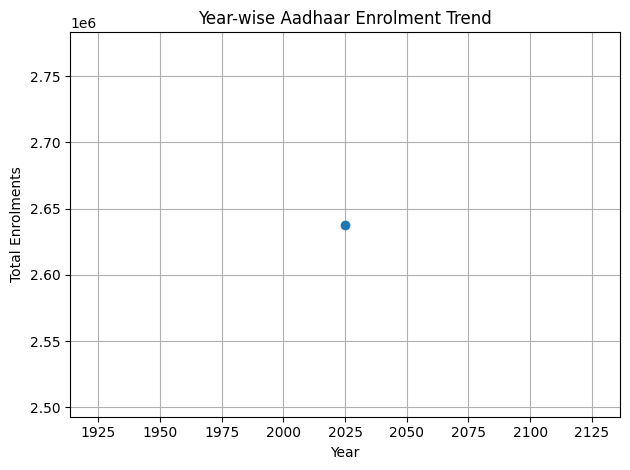

In [36]:
plt.figure()
yearly_trend.plot(marker="o")
plt.title("Year-wise Aadhaar Enrolment Trend")
plt.xlabel("Year")
plt.ylabel("Total Enrolments")
plt.grid(True)
plt.tight_layout()
plt.savefig("../outputs/figures/enrolment_trends.png")
plt.show()


In [37]:
df_biometric["total_biometric_updates"] = (
    df_biometric["bio_age_5_17"] + df_biometric["bio_age_17_"]
)

biometric_state = (
    df_biometric
    .groupby("state")["total_biometric_updates"]
    .sum()
    .sort_values(ascending=False)
)

biometric_state.head()


state
Uttar Pradesh     9577735
Maharashtra       9226139
Madhya Pradesh    5923771
Bihar             4897587
Tamil Nadu        4698117
Name: total_biometric_updates, dtype: int64

In [29]:
monthly_avg = df_enrolment.groupby(df_enrolment["date"].dt.month)["total_enrolments"].mean()

df_enrolment["anomaly"] = df_enrolment.apply(
    lambda row: row["total_enrolments"] > 2 * monthly_avg[row["date"].month],
    axis=1
)

df_enrolment[df_enrolment["anomaly"] == True].head()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_1224\2508919375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enrolment["anomaly"] = df_enrolment.apply(


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrolments,year,anomaly
0,2025-02-03,Meghalaya,East Khasi Hills,793121,11,61,37,109,2025,True
1,2025-09-03,Karnataka,Bengaluru Urban,560043,14,33,39,86,2025,True
2,2025-09-03,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,123,2025,True
3,2025-09-03,Uttar Pradesh,Aligarh,202133,62,29,15,106,2025,True
4,2025-09-03,Karnataka,Bengaluru Urban,560016,14,16,21,51,2025,True


In [30]:
import os

os.makedirs("../outputs/tables", exist_ok=True)

df_enrolment[df_enrolment["anomaly"] == True].to_csv(
    "../outputs/tables/anomaly_detection.csv",
    index=False
)


In [33]:
df_demographic["total_population"] = (
    df_demographic["demo_age_5_17"] + df_demographic["demo_age_17_"]
)

population_state = (
    df_demographic
    .groupby("state")["total_population"]
    .sum()
)

population_state.head()


state
100000                               2
Andaman & Nicobar Islands         1059
Andaman and Nicobar Islands       6187
Andhra Pradesh                 2295505
Arunachal Pradesh                36443
Name: total_population, dtype: int64

In [38]:
summary_df = pd.DataFrame({
    "total_enrolments": state_enrolment,
    "population": population_state,
    "biometric_updates": biometric_state
})

summary_df.to_csv(
    "../outputs/tables/summary_statistics.csv"
)

summary_df.head()


,total_enrolments,population,biometric_updates
state,,,
100000,10.0,2.0,NaN
Andaman & Nicobar Islands,30.0,1059.0,2384.0
Andaman and Nicobar Islands,143.0,6187.0,18314.0
Andhra Pradesh,41947.0,2295505.0,3714592.0
Arunachal Pradesh,2027.0,36443.0,72394.0
